# 911 Calls Project 

For this project I will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)


## Data and Setup

____
Importing numpy and pandas.

In [36]:
import numpy as np
import pandas as pd
import matplotlib.dates as mdates

 Importing visualization libraries and setting %matplotlib inline. 

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

Reading in the csv file as a dataframe called df

In [4]:
df = pd.read_csv(r"C:\Users\acer\OneDrive\Documents\DS-ML\Refactored_Py_DS_ML_Bootcamp-master\10-Data-Capstone-Projects\911.csv")

Checking the info() of the df.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


Checking the head of df.

In [28]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1


## Basic Questions

What are the top 5 zipcodes for 911 calls?

In [6]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

What are the top 5 townships (twp) for 911 calls?

In [30]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

How many unique title codes are there? 

In [7]:
df['title'].nunique()

110

## Creating new features

Creating a new column called "Reason" using the .apply() function with a custom lambda expression. This new column extracts the string value before the title code from the "titles" column. For example, if the title column value is "EMS: BACK PAINS/INJURY," the Reason column value would be "EMS."

In [8]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

What is the most common Reason for a 911 call based off of this new column? 

In [9]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

Using seaborn to create a countplot of 911 calls by Reason. 

Text(0, 0.5, 'Count')

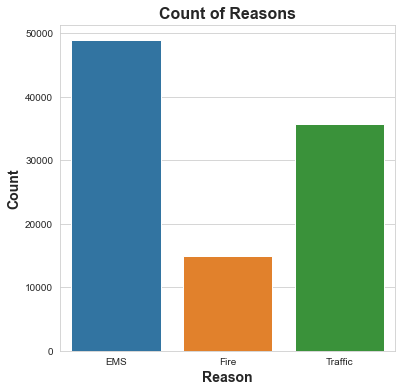

In [18]:
plt.figure(figsize=(6, 6))
sns.countplot(x='Reason', data=df, palette='tab10')

# Adding a title and labels
plt.title('Count of Reasons', fontsize=16, fontweight='bold')
plt.xlabel('Reason', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')


Focusing on the time information. What is the data type of the objects in the "timeStamp" column?

In [19]:
type(df['timeStamp'].iloc[0])

str

Using [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects.

In [20]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

Now that the timestamp column are actually DateTime objects, using .apply() to create 3 new columns called Hour, Month, and Day of Week.

In [21]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

Using the .map() to map the actual string names to the day of the week.


In [22]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [23]:
df['Day of Week'] = df['Day of Week'].map(dmap)

Now using seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.

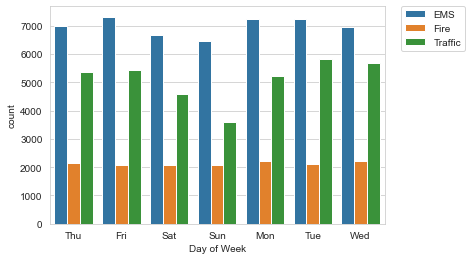

In [24]:
sns.countplot(x='Day of Week',data=df,hue='Reason',palette='tab10')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

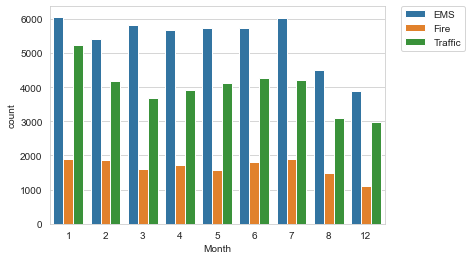

In [25]:
sns.countplot(x='Month',data=df,hue='Reason',palette='tab10')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

The plot is missing 9,10 and 11 months.

Creating a gropuby object called byMonth, where I group the DataFrame by the month column and use the count() method for aggregation. 

In [26]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


Creating a simple plot off of the dataframe indicating the count of calls per month.

<AxesSubplot:xlabel='Month'>

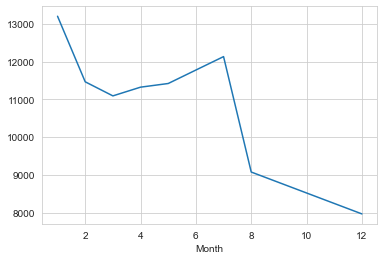

In [28]:
byMonth['twp'].plot()

Using seaborn's lmplot() to create a linear fit on the number of calls per month.

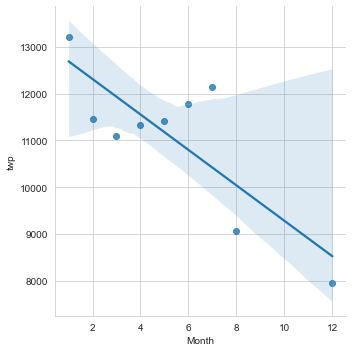

In [29]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

Creating a new column called 'Date' that contains the date from the timeStamp column.

In [30]:
df['Date']=df['timeStamp'].apply(lambda t: t.date())

Using groupby on the Date column with the count() aggregate and creating a plot of counts of 911 calls.

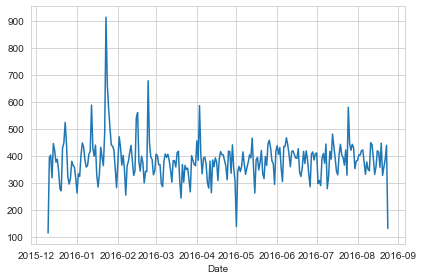

In [31]:
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

Recreating this plot with 3 separate plots with each plot representing a Reason for the 911 call.

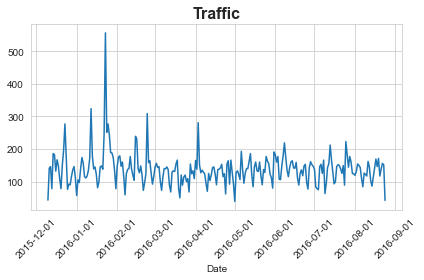

In [39]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
# Adding title
plt.title('Traffic', fontsize=16, fontweight='bold')

# Formatting the date labels
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())

# Rotating date labels for better readability
plt.xticks(rotation=45)

# Adjusting layout to prevent clipping of tick-labels
plt.tight_layout()

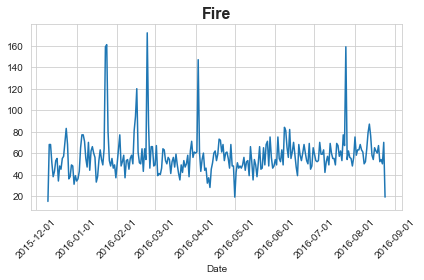

In [38]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
# Adding title
plt.title('Fire', fontsize=16, fontweight='bold')

# Formatting the date labels
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())

# Rotating date labels for better readability
plt.xticks(rotation=45)

# Adjusting layout to prevent clipping of tick-labels
plt.tight_layout()

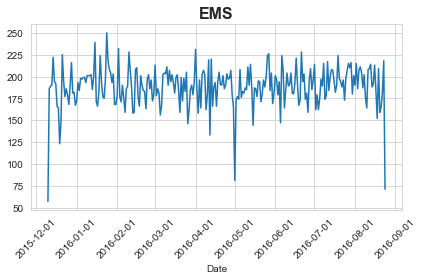

In [37]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
# Adding title
plt.title('EMS', fontsize=16, fontweight='bold')

# Formatting the date labels
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())

# Rotating date labels for better readability
plt.xticks(rotation=45)

# Adjusting layout to prevent clipping of tick-labels
plt.tight_layout()

____
Creating  heatmaps with seaborn.

In [40]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

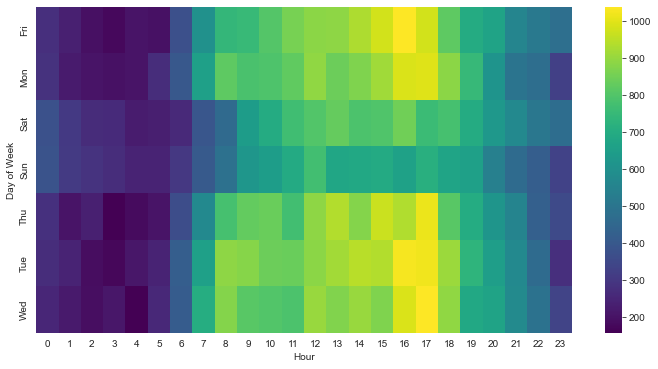

In [44]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

Creating a clustermap.

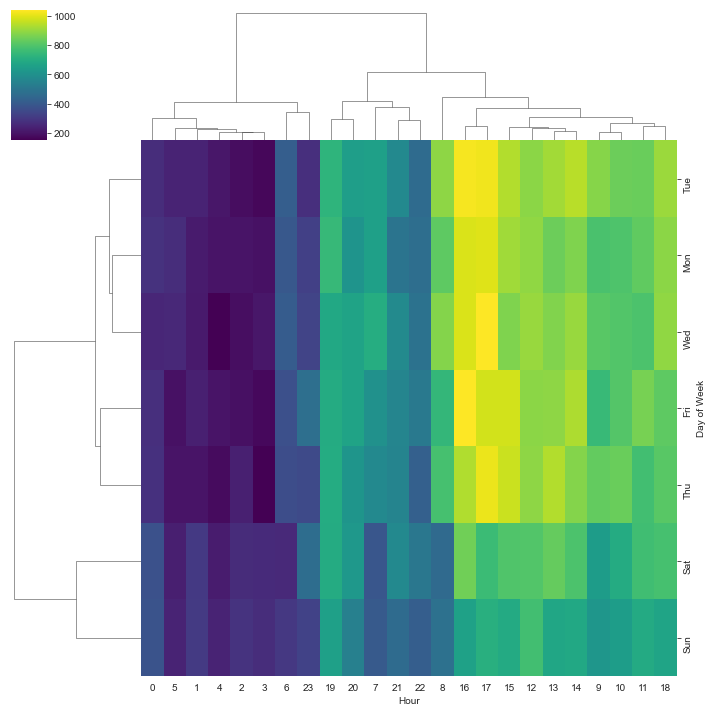

In [45]:
sns.clustermap(dayHour,cmap='viridis')

In [46]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

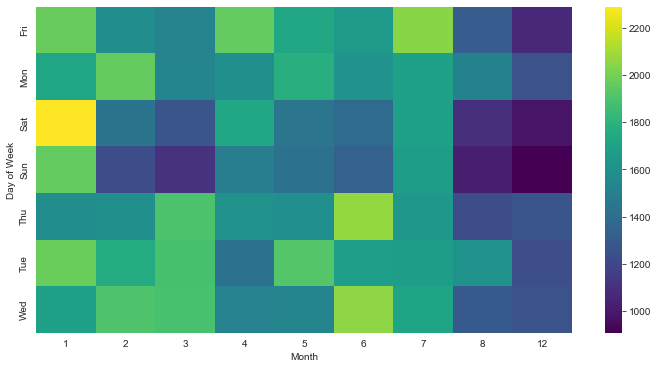

In [47]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis')

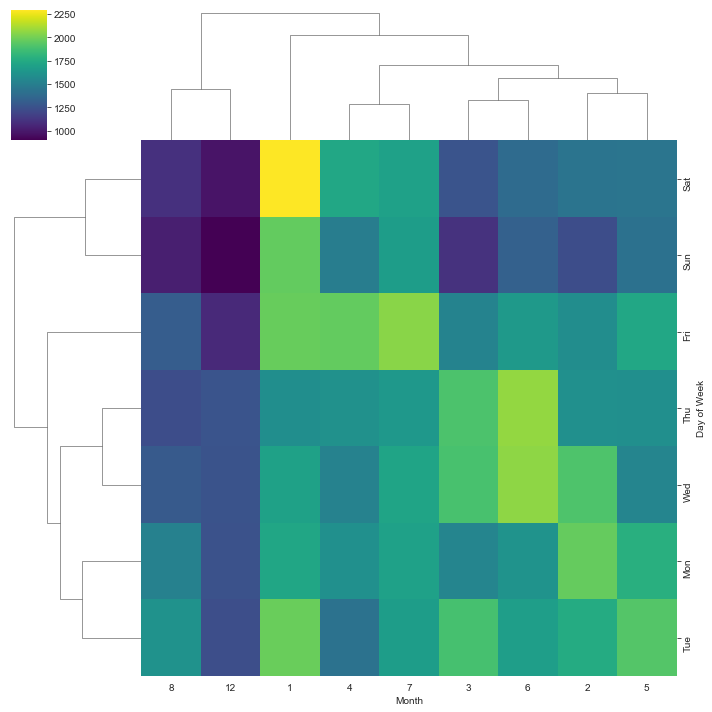

In [49]:
sns.clustermap(dayMonth,cmap='viridis')